In [1]:
import pandas as pd
import random, itertools, time
import matplotlib.pyplot as plt

class SMTWTPbyTabu:
    def __init__(self, csv, truncate=None):    
        self.df = pd.read_csv(csv)
        self.df = self.df.rename(columns={"Job":"job", "processing time (hours)":"processingTime", \
            "due date (hours)":"dueTime"})
        self.df = self.df[:truncate] if truncate else self.df
        self.tabu, self.tabusize = set(), int(len(self.df)**2)
        
    def loss(self, arrange):
        t, loss = 0, 0
        for job in arrange:
            _, weight, processTime, dueTime = self.df[self.df["job"]==job].iloc[0,:].to_list()
            t+=processTime
            loss+=weight*max(t-dueTime,0) 
        return loss
    
    def deterministicSolution(self):
        minLoss, minAns, allLoss = float('inf'), self.df["job"].to_list(), []
        for state in itertools.permutations(minAns):
            allLoss.append( self.loss(state) )
            if allLoss[-1] < minLoss:
                minLoss, minAns = allLoss[-1], state
        return minLoss, minAns, allLoss
    
    def initialize(self):
        init = self.df["job"].to_list()
        random.shuffle(init)
        return tuple(init)
    
    def generateNext(self, state):
        nextList = []
        for x,y in itertools.combinations(list(range(len(state))),2):
            nextState = list(state)
            nextState[x], nextState[y] = nextState[y], nextState[x]
            nextList.append( tuple(nextState) )
        return nextList
    
    def heuristicSolution(self):
        state = self.initialize()
        historyMinLoss, historyMinAns, allLoss = float('inf'), state, [self.loss(state)]
        self.tabu.add( tuple(state) )
        for i in range(100):
            nextList = self.generateNext(state)
            localMinLoss, localMinAns = float('inf'), state
            for nextState in nextList:
                if tuple(nextState) not in self.tabu:
                    newLoss = self.loss(nextState)
                    if newLoss<localMinLoss:
                        localMinLoss=newLoss
                        localMinAns=nextState
            allLoss.append(localMinLoss)
            historyMinLoss = min(historyMinLoss, localMinLoss)
            state = localMinAns
        return historyMinLoss, historyMinAns, allLoss

In [2]:
obj = SMTWTPbyTabu("Instance_10.csv", 7)
print(obj.df)
start = time.time()
historyMinLoss, historyMinAns, allLoss = obj.heuristicSolution()
print(historyMinLoss, historyMinAns)
print(time.time()-start)

   job  weight  processingTime  dueTime
0    1     0.5             1.5        4
1    2     0.8             2.2        4
2    3     0.6             0.5        4
3    4     0.4             1.6        6
4    5     0.4             3.5        6
5    6     0.1             2.1        6
6    7     0.2             2.5        8
2.9700000000000006 (5, 4, 3, 2, 7, 1, 6)
7.358264446258545


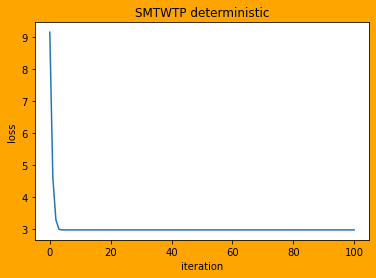

In [4]:
ax = plt.figure()
ax.set_facecolor("orange")
plt.title("SMTWTP deterministic")
plt.plot(allLoss)
plt.xlabel("iteration")
plt.ylabel("loss")
plt.show()

In [5]:
obj = SMTWTPbyTabu("Instance_10.csv", 7)
print(obj.df)
start = time.time()
minLoss, minAns, allLoss = obj.deterministicSolution()
print(minLoss, minAns)
print(time.time()-start)

   job  weight  processingTime  dueTime
0    1     0.5             1.5        4
1    2     0.8             2.2        4
2    3     0.6             0.5        4
3    4     0.4             1.6        6
4    5     0.4             3.5        6
5    6     0.1             2.1        6
6    7     0.2             2.5        8
2.9700000000000006 (2, 3, 1, 4, 5, 7, 6)
17.550971269607544


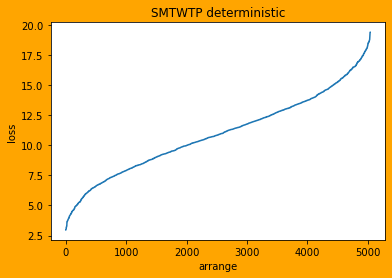

2.9700000000000006 19.379999999999995


In [7]:
ax = plt.figure()
ax.set_facecolor("orange")
plt.title("SMTWTP deterministic")
plt.plot(sorted(allLoss))
plt.xlabel("arrange")
plt.ylabel("loss")
plt.show()
print(min(allLoss), max(allLoss))